# Recreation of RNaseP time-resolved probing

In [1]:
import rnavigate as MaP

## Load data

Here we have 3 samples, TMO-treated RNase P construct:
1. in the absence of Mg++
2. partially folded with Mg++ for 30 seconds
3. fully folded with Mg++ for 1200 seconds

In [2]:
rc0 = MaP.Sample(sample="No Mg++",
                 shapemap="RC0_rnasep_profile.txt",
                 ringmap="RC0_rnasep_rings.txt",
                 ss="RC_CRYSTAL_STRUCTURE.xrna",
                 pdb="3dhsCrystal_PlusLoops.pdb",
                 pdb_kwargs={"chain":"A"})

rc30 = MaP.Sample(sample="partially folded",
                  shapemap="RC30_rnasep_profile.txt",
                  ringmap="RC30_rnasep_rings.txt",
                  ss="RC_CRYSTAL_STRUCTURE.xrna",
                  pdb="3dhsCrystal_PlusLoops.pdb",
                  pdb_kwargs={"chain":"A"})

rc1200 = MaP.Sample(sample="fully folded",
                    shapemap="RC1200_rnasep_profile.txt",
                    ringmap="RC1200_rnasep_rings.txt",
                    ss="RC_CRYSTAL_STRUCTURE.xrna",
                    pdb="3dhsCrystal_PlusLoops.pdb",
                    pdb_kwargs={"chain":"A"})

sample_list = [rc0, rc30, rc1200]

## Detailed structure

First, I will make a custom list of colors, one for each nucleotide in RNaseP,
to highlight the important interactions:

1. L5.1-L15.1 interaction in red
2. P6 in orange
3. P2 in blue
4. Catalytic core in purple

Here, I'm making a reference structure diagram that has a little more
detail, as a reference for the more information rich plots I will be making later.

I will use our custom color list, applied to the nucleotide lettering `colors=c_list, apply_color_to="sequence"`. Then, I will use matplotlib to add labels to each of the structural features.

In [3]:
c_list = MaP.get_color_list(
    length = rc0.data["ss"].length,
    default = "grey",
    color_regions = {
        "DarkOrchid":[[236, 240], [181, 188], [45, 47], [49, 49], [127, 128]],
        "DodgerBlue":[[189, 195], [15, 21]],
        "orange":[[58, 62], [101, 105]],
        "red": [[70, 75], [141, 146]]
    }
)

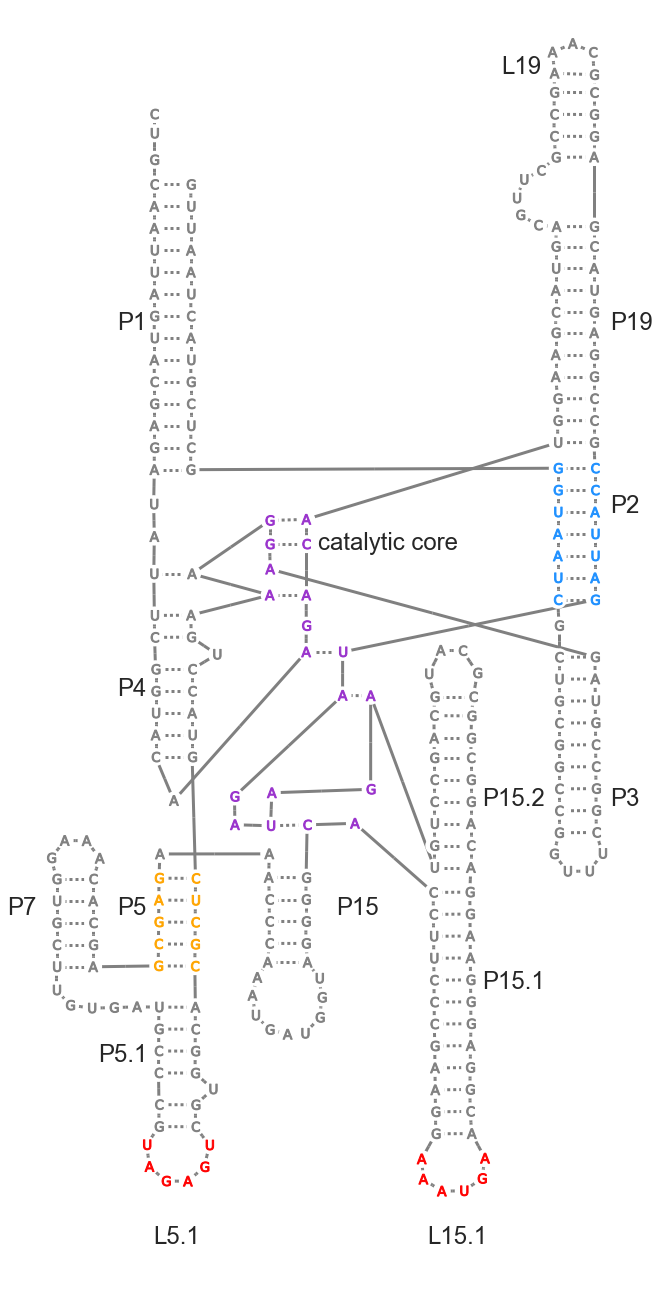

In [4]:
plot = rc0.plot_ss(
    colors=c_list,
    apply_color_to="sequence",
    title=False
    )

# To to help locate the labels, I turned on the axes and grid
# ax.axis("on")
# ax.set(yticks=range(-18,21),
#        xticks=range(-10, 10))
# ax.grid()

ax = plot.axes[0,0]
ax.text(0, 4, "catalytic core")
ax.text(-5.5, 10, 'P1')
ax.text(-5.5, 0, 'P4')
ax.text(-5.5, -6, 'P5')
ax.text(-8.5, -6, 'P7')
ax.text(0.5, -6, 'P15')
ax.text(-6, -10, 'P5.1')
ax.text(5, 17, 'L19')
ax.text(8, 10, 'P19')
ax.text(8, 5, 'P2')
ax.text(8, -3, 'P3')
ax.text(4.5, -3, 'P15.2')
ax.text(4.5, -8, 'P15.1')
ax.text(3, -15, 'L15.1')
ax.text(-4.5, -15, 'L5.1');


## Time-resolved RINGs

Next, for each of the samples, I will plot the RING-MaP interactions in green `samples=sample_list, ij="ringmap", cmap="green"` on my secondary structure file `structure="ss"` (default). I will apply my new custom color list to the nucleotide circles `colors=c_list, apply_color_to="background"`. To limit the number of RINGs being plotted, I'm using a very hight Gapc-cutoff of 500 `Statistic_ge=500, positive_only=True`. Finally, I'm turning off the colorbar, since I'm using a single color to show RINGs `colorbar=False`.

Note: This data differs from the original published data by being much higher read depth. Therefore, the sets of rings looks different, but the major differences between states are the same.


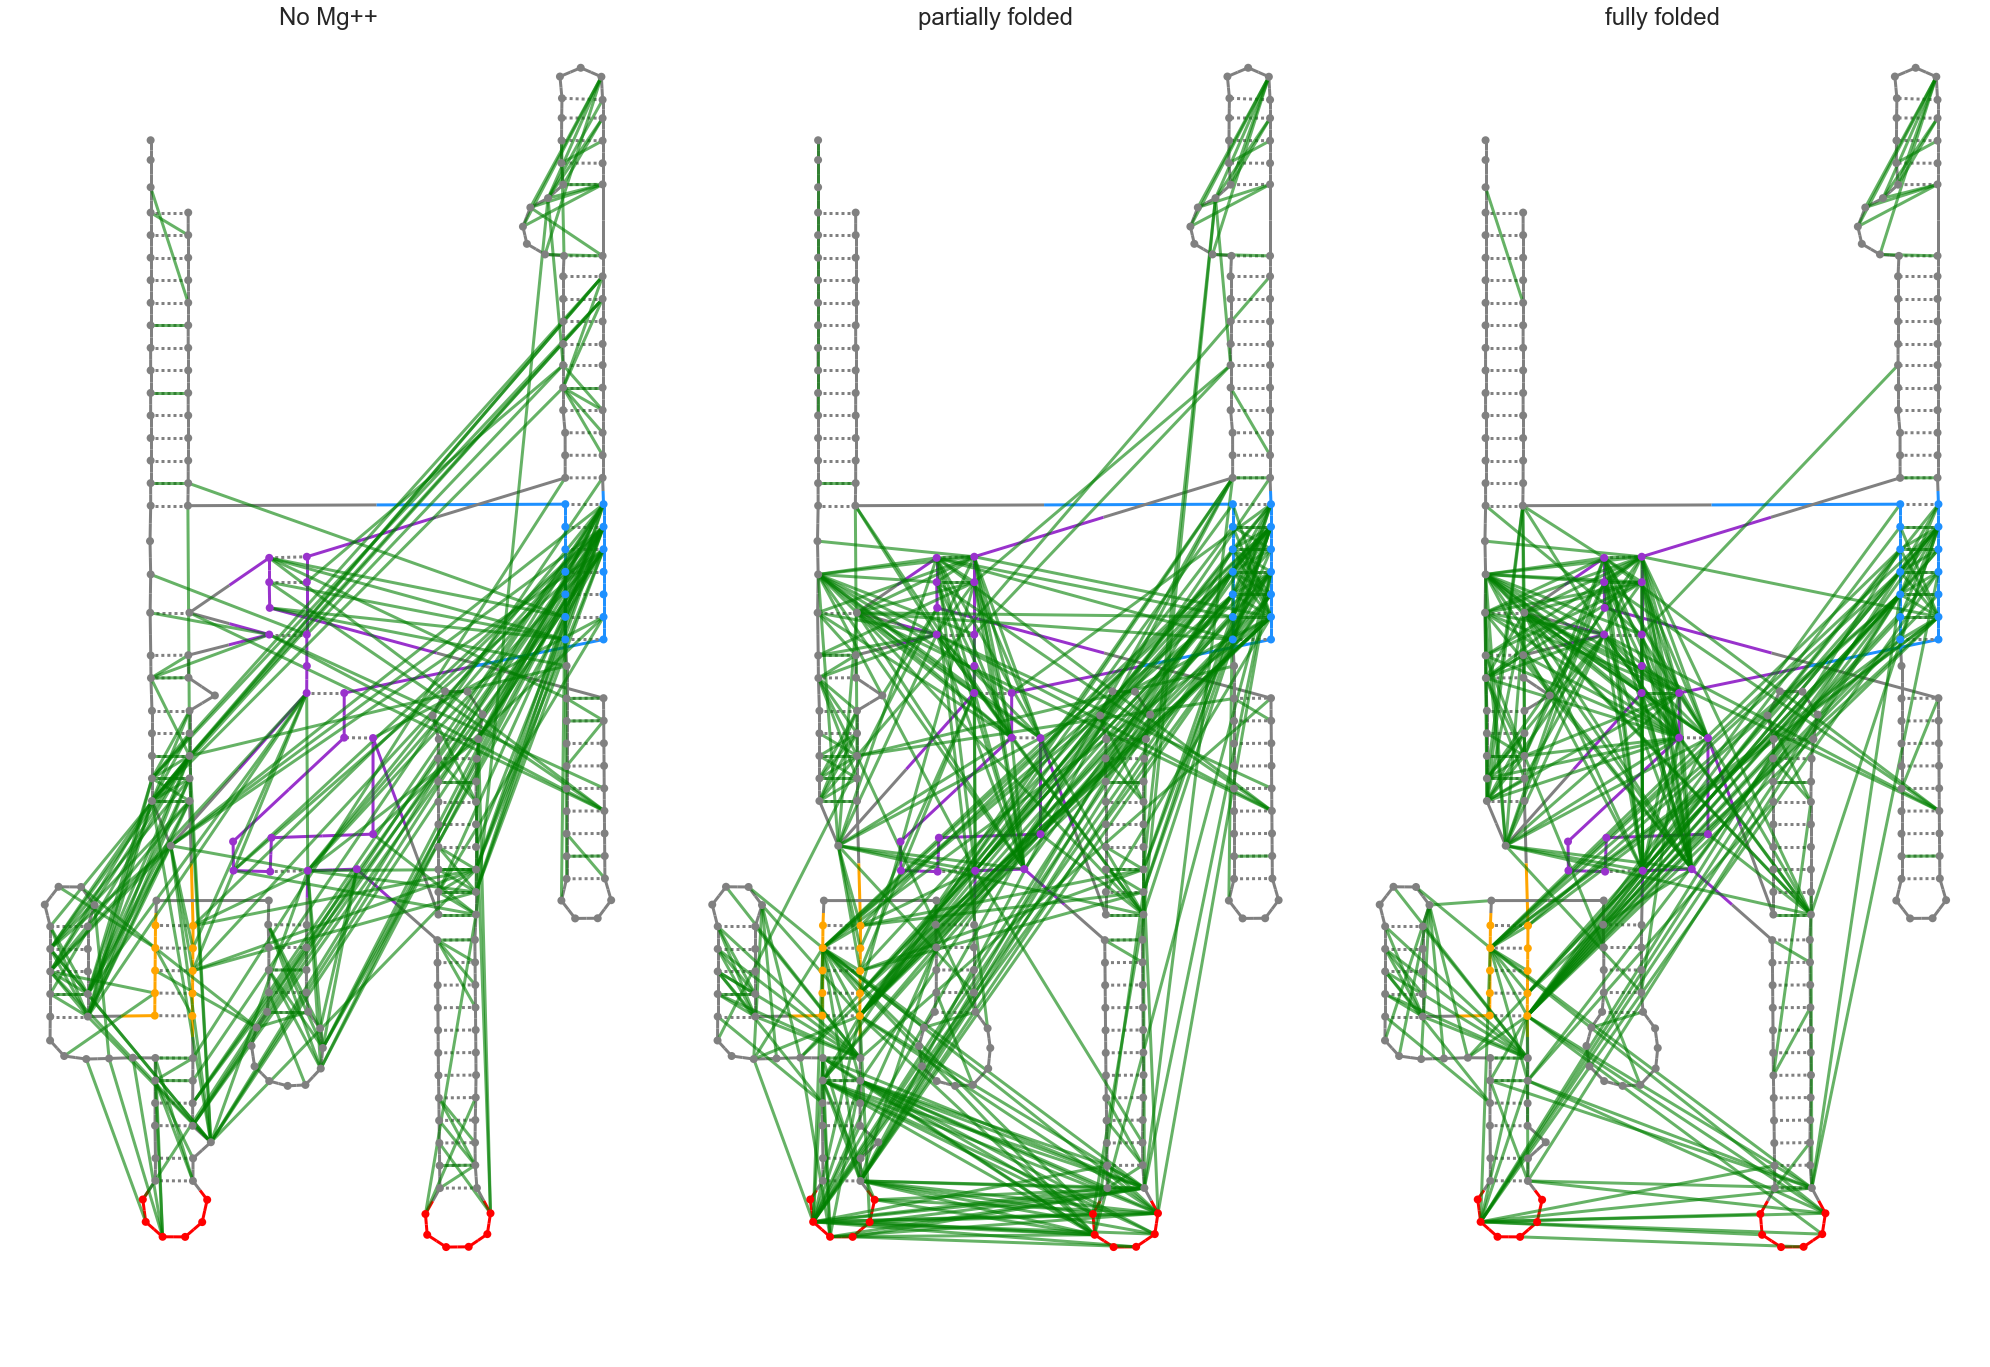

In [5]:
MaP.plot_ss_multisample(          # plot data on secondary structure
    samples=sample_list,          # 1 plot for each sample in sample_list
    interactions="ringmap",       # show ringmap interactions...
    interactions_filter={         # that are filtered
        "Statistic_ge": 500,      # Gapc statistic >= 500
        "positive_only":True,     # positive correlations
        "cmap": "green"},         # in green (single color)
    colorbar=False,               # turn of the colorbar (colormap legend)
    colors=c_list,                # Apply custom color list...
    apply_color_to="structure")   # to the structure lines

## Heatmaps with regions of interest

Heatmaps are a good way to view very dense 2D data, but they can be hard to
interpret. The reader is helped here by highlighting regions which
illustrate the appearance of time-dependent structural interactions.

Custom regions can be passed as a list of pairs of spans ((y1, y2), (x1, x2)),
where y1-y2 (inclusive) is interacting with x1-x2.

Here, I'm using the kernal density estimate (plot_type="kde") to further
simplify the visualization, an improvement over the published figure.

RING-MaP interactions (ij="ringmap") are being filtered for positive
correlations (positive_only=True), visualized on a green color scale
(cmap="Greens") from 0 to 100 (min_max=[0,100]) Gapc (default).


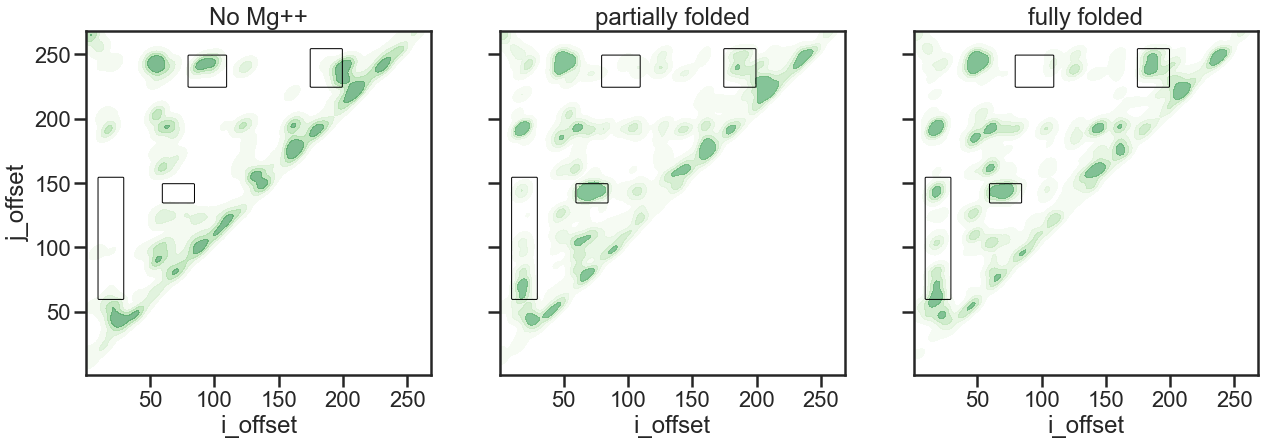

In [6]:
regions = [((225,250), (80,110)),     # ((x1, x2), (y1, y2))
           ((225,255), (175,200)),    # highlights interactions between region
           ((135,150), (60,85)),      # x1-x2 and y1-y2
           ((60,155), (10, 30))]

MaP.plot_heatmap_multisample(
    samples=[rc0, rc30, rc1200],
    structure="ss",
    interactions="ringmap",
    interactions_filter={
        "positive_only": True,
        "cmap": "Greens",
        "min_max": [0, 100]},
    regions=regions,
    plot_type="kde")

## Plot fully folded RINGs on 3D structure

You appear to be running in JupyterLab (or JavaScript failed to load for some other reason). You need to install the 3dmol extension: 
 jupyter labextension install jupyterlab_3dmol

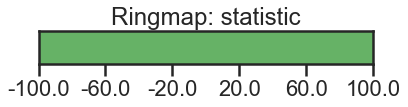

In [7]:
rc1200.plot_mol(
    interactions="ringmap",
    interactions_filter={
        "Statistic": 500,
        "positive_only": True,
        "cmap": "green"},
    nt_color=c_list,
    title=False
)